In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
bikes = pd.read_csv('citibike_feb2014.csv', index_col=16)

In [3]:
bikes.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,tripduration_log
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617,6.331497
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592,0.700066
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000,4.094345
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000,5.886104
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000,6.298949
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000,6.739337
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000,13.549078


In [4]:
bikes['starttime'] = pd.to_datetime(bikes['starttime'])
bikes['stoptime'] = pd.to_datetime(bikes['stoptime'])

In [6]:
bikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_log
id,,,,,,,,,,,,,,,,
0,382,2014-02-01,2014-02-01 00:06:00,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1,5.945421
1,372,2014-02-01,2014-02-01 00:06:00,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2,5.918894
2,591,2014-02-01,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2,6.381816
3,583,2014-02-01,2014-02-01 00:10:00,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1,6.368187
4,223,2014-02-01,2014-02-01 00:04:00,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1,5.407172


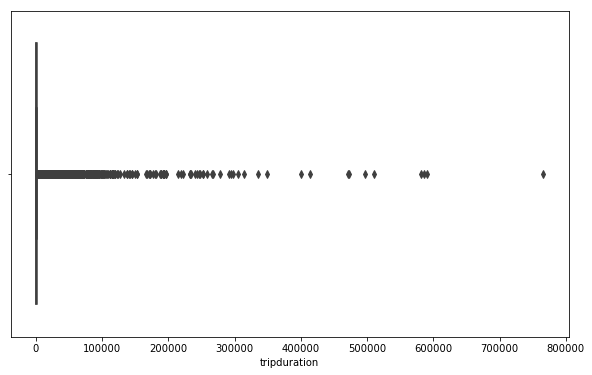

In [7]:
sns.boxplot(bikes['tripduration'])

In [8]:
bikes['tripduration_log'] = np.log(bikes['tripduration'])

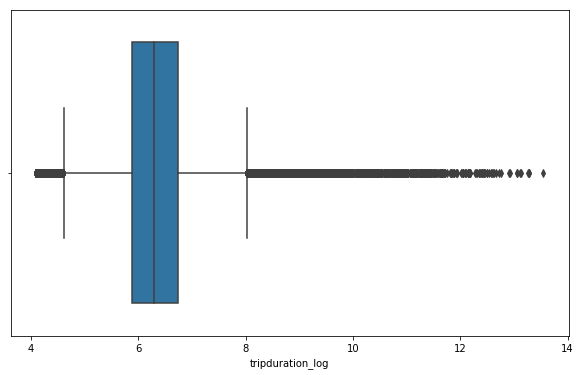

In [9]:
sns.boxplot(bikes['tripduration_log'])

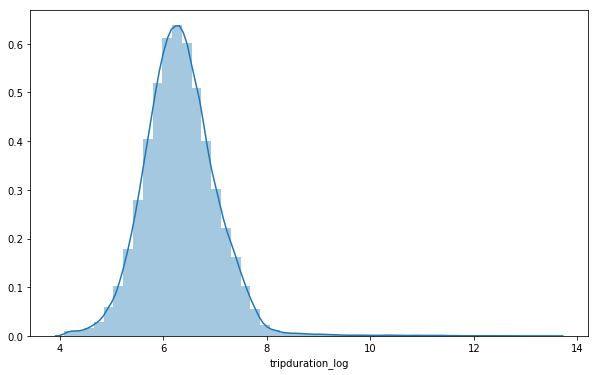

In [10]:
sns.distplot(bikes['tripduration_log'])

In [12]:
bikes = pd.concat([bikes,pd.get_dummies(bikes.gender, prefix='gender',drop_first=True)],axis=1)
bikes = pd.concat([bikes,pd.get_dummies(bikes.usertype, prefix='usertype',drop_first=True)],axis=1)
bikes

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_log,gender_1,gender_2,usertype_Subscriber
id,,,,,,,,,,,,,,,,,,,
0,382,2014-02-01 00:00:00,2014-02-01 00:06:00,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1,5.945421,1,0,1
1,372,2014-02-01 00:00:00,2014-02-01 00:06:00,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2,5.918894,0,1,1
2,591,2014-02-01 00:00:00,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2,6.381816,0,1,1
3,583,2014-02-01 00:00:00,2014-02-01 00:10:00,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1,6.368187,1,0,1
4,223,2014-02-01 00:00:00,2014-02-01 00:04:00,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1,5.407172,1,0,1
5,541,2014-02-01 00:00:00,2014-02-01 00:09:00,152,Warren St & Church St,40.714740,-74.009106,331,Pike St & Monroe St,40.711731,-73.991930,18674,Subscriber,1990,1,6.293419,1,0,1
6,354,2014-02-01 00:01:00,2014-02-01 00:06:00,325,E 19 St & 3 Ave,40.736245,-73.984738,439,E 4 St & 2 Ave,40.726281,-73.989780,16975,Subscriber,1991,1,5.869297,1,0,1
7,916,2014-02-01 00:01:00,2014-02-01 00:16:00,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,395,Bond St & Schermerhorn St,40.688070,-73.984106,16020,Subscriber,1978,1,6.820016,1,0,1
8,277,2014-02-01 00:01:00,2014-02-01 00:06:00,375,Mercer St & Bleecker St,40.726795,-73.996951,369,Washington Pl & 6 Ave,40.732241,-74.000264,18891,Subscriber,1944,1,5.624018,1,0,1


In [13]:
df = pd.DataFrame({'sum_tripduration':bikes.set_index('starttime').resample('D').tripduration.sum(),
                   'trips_count': bikes.set_index('starttime').resample('D').tripduration.count()})
df

,sum_tripduration,trips_count
starttime,,
2014-02-01,10475762,12771
2014-02-02,11388439,13816
2014-02-03,2073611,2600
2014-02-04,6553869,8709
2014-02-05,2540986,2746
2014-02-06,7489712,7196
2014-02-07,8910799,8495
2014-02-08,6241376,5986
2014-02-09,5132516,4996


In [14]:
df.sum_tripduration[df.sum_tripduration.isnull()] = 0

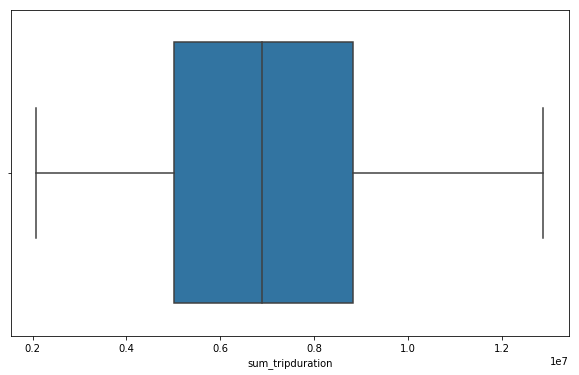

In [15]:
sns.boxplot(df['sum_tripduration'])

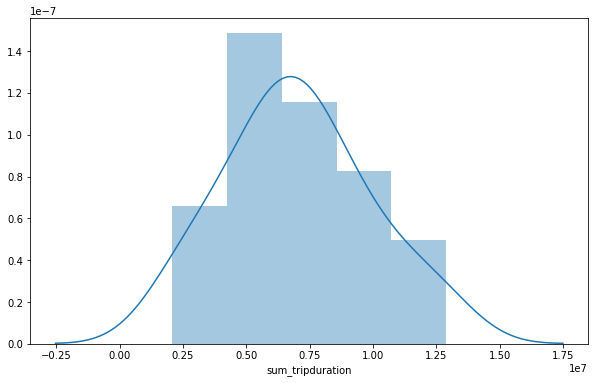

In [16]:
sns.distplot(df['sum_tripduration'])

In [17]:
df.describe()

,sum_tripduration,trips_count
count,2.800000e+01,28.000000
mean,7.019146e+06,8026.285714
std,2.855120e+06,3948.837962
min,2.073611e+06,876.000000
25%,5.022964e+06,4960.500000
50%,6.889774e+06,8500.500000
75%,8.829460e+06,11853.000000
max,1.289115e+07,13816.000000


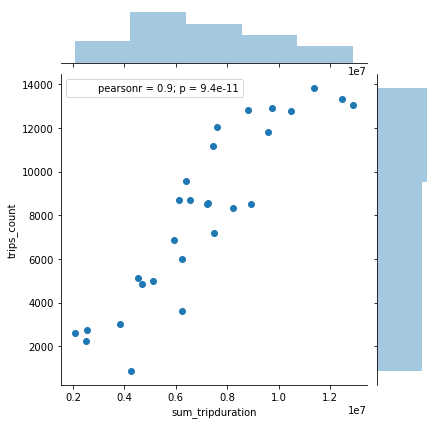

In [18]:
sns.jointplot(df['sum_tripduration'], df['trips_count'])

In [19]:
import statsmodels.formula.api as smf
model1 = smf.ols('sum_tripduration ~ trips_count', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sum_tripduration   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           9.39e-11
Time:                        01:19:57   Log-Likelihood:                -432.47
No. Observations:                  28   AIC:                             868.9
Df Residuals:                      26   BIC:                             871.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.809e+06   5.57e+05      3.250      0.003    6.65e+05    2.95e+06
trips_count   649.1446     62.444     10.396      0.000     520.789     777.500
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.333
Skew:                           0.394   Prob(JB):                        0.513
Kurtosis:                       2.278   Cond. No.                     2.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""